## Полносвязные нейронные сети прямого распространения (перцептрон)

Многослойный перцептрон (MLP, Multilayer Perceptron) — это один из базовых типов искусственных нейронных сетей, который состоит из нескольких слоев нейронов. MLP используется для решения задач классификации и регрессии.

![mlp](./lecture6/mlp.jpg)
### 1. **Структура MLP**

MLP состоит из трех типов слоев:
1. **Входной слой (Input Layer)**:
   - Содержит нейроны, которые принимают входные данные (признаки).
   - Количество нейронов равно количеству признаков.

2. **Скрытые слои (Hidden Layers)**:
   - Промежуточные слои между входным и выходным слоями.
   - Каждый нейрон в скрытом слое принимает входные данные от всех нейронов предыдущего слоя, выполняет линейную комбинацию и применяет функцию активации.
   - Количество скрытых слоев и нейронов в них задается вручную и зависит от задачи.

3. **Выходной слой (Output Layer)**:
   - Содержит нейроны, которые возвращают результат работы сети.
   - Для задач регрессии обычно используется один нейрон.
   - Для задач классификации количество нейронов равно количеству классов (в случае многоклассовой классификации).

---

### 2. **Как работает один нейрон**

Каждый нейрон в MLP выполняет следующие шаги:
1. **Линейная комбинация**:
   - Нейрон вычисляет взвешенную сумму входных данных:
     $$
     z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,
     $$
     где:
     - $ x_1, x_2, \dots, x_n $ — входные данные,
     - $ w_1, w_2, \dots, w_n $ — веса,
     - $ b $ — смещение (bias).

2. **Функция активации**:
   - К результату линейной комбинации применяется нелинейная функция активации $ \sigma $:
     $$
     a = \sigma(z).
     $$
   - Функция активации добавляет нелинейность, что позволяет сети обучаться сложным зависимостям.

---

### 3. **Функции активации**

Функции активации определяют, как нейрон реагирует на входные данные. Примеры:
- **ReLU (Rectified Linear Unit)**:
  $$
  \sigma(z) = \max(0, z).
  $$
- **Сигмоида**:
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}.
  $$
- **Гиперболический тангенс (tanh)**:
  $$
  \sigma(z) = \tanh(z).
  $$
- **Softmax** (для выходного слоя в задачах классификации):
  $$
  \sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}.
  $$

---

### 4. **Прямое распространение (Forward Pass)**

Прямое распространение — это процесс вычисления выхода сети на основе входных данных:
1. Входные данные подаются на входной слой.
2. Данные последовательно проходят через скрытые слои, где каждый нейрон вычисляет линейную комбинацию и применяет функцию активации.
3. На выходном слое получается результат работы сети.

---

### 5. **Функция потерь (Loss Function)**

Функция потерь измеряет, насколько предсказания сети отличаются от истинных значений. Примеры:
- Для регрессии: **Среднеквадратичная ошибка (MSE)**:
  $$
  L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2,
  $$
  где $ y_i $ — истинное значение, $ \hat{y}_i $ — предсказанное значение.
- Для классификации: **Кросс-энтропия**:
  $$
  L = -\sum_{i=1}^N y_i \log(\hat{y}_i).
  $$

---

### 6. **Обратное распространение ошибки (Backpropagation)**

Обратное распространение — это процесс вычисления градиентов функции потерь по всем параметрам сети (весам и смещениям). Основные шаги:
1. Вычисляется ошибка на выходном слое.
2. Ошибка передается назад через сеть с использованием цепного правила дифференцирования.
3. Для каждого слоя вычисляются градиенты по весам и смещениям:
   $$
   \frac{\partial L}{\partial w} = \delta \cdot a_{\text{prev}},
   $$
   $$
   \frac{\partial L}{\partial b} = \delta,
   $$
   где $ \delta $ — ошибка на текущем слое, $ a_{\text{prev}} $ — активации предыдущего слоя.

### Пример для одного нейрона

Рассмотрим простой пример для одного нейрона с функцией активации $ \sigma(z) = \frac{1}{1 + e^{-z}} $ (сигмоида).

1. Прямое распространение:
   $$
   z = w \cdot x + b,
   $$

   Выход нейронной сети
   $$
   a = \sigma(z) 
   $$

3. Обратное распространение:
   - Градиент функции потерь по $ a $:
     $$
     \frac{\partial L}{\partial a}.
     $$
   - Градиент по $ z $:
     $$
     \delta = \frac{\partial L}{\partial z} = \frac{\partial L}{\partial a} \cdot \sigma'(z),
     $$
     где $ \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $.
   - Градиенты по весу и смещению:
     $$
     \frac{\partial L}{\partial w} = \delta \cdot x,
     $$
     $$
     \frac{\partial L}{\partial b} = \delta.
     $$
Процедура может быть продолжена на предыдущем слое по аналогии. В случае множества нейронов в слое процедура и нотация усложняются, но суть метода не меняется!

### Градиентный спуск

Градиентный спуск — это итеративный метод оптимизации, который минимизирует функцию потерь, обновляя параметры модели в направлении, противоположном градиенту функции потерь.

![gd](./lecture6/gd.gif)

1. **Инициализация параметров**:
   - Параметры модели (веса и смещения) инициализируются случайными значениями.

2. **Вычисление градиента**:
   - На каждой итерации вычисляется градиент функции потерь по всем параметрам модели. Градиент — это вектор частных производных функции потерь по каждому параметру:
     $$
     \nabla L(\theta) = \left( \frac{\partial L}{\partial \theta_1}, \frac{\partial L}{\partial \theta_2}, \dots, \frac{\partial L}{\partial \theta_n} \right),
     $$
     где $ \theta $ — вектор параметров модели.

3. **Обновление параметров**:
   - Параметры обновляются по формуле:
     $$
     \theta := \theta - \eta \nabla L(\theta),
     $$
     где $ \eta $ — скорость обучения (learning rate), которая определяет размер шага.

4. **Повторение**:
   - Шаги 2 и 3 повторяются до тех пор, пока функция потерь не достигнет минимума или пока не выполнится заданное количество итераций.

- **Пакетный режим (Batch Gradient Descent)**: На каждой итерации используются все данные из обучающей выборки для вычисления градиента.
- **Преимущества**:
  - Стабильность: градиент вычисляется на всех данных, что обеспечивает плавное движение к минимуму.
- **Недостатки**:
  - Медленная работа на больших данных: вычисление градиента на всех данных требует много времени и памяти.
  - Может застревать в локальных минимумах.

### Стохастический градиентный спуск

модификация градиентного спуска, где градиент вычисляется не на всех данных, а на одном случайном примере (или небольшом пакете примеров).

1. **Инициализация параметров**:
   - Параметры модели инициализируются случайными значениями.

2. **Выбор случайного примера**:
   - На каждой итерации случайным образом выбирается один пример (или небольшой пакет примеров) из обучающей выборки.

3. **Вычисление градиента**:
   - Градиент функции потерь вычисляется только для выбранного примера (или пакета):
     $$
     \nabla L(\theta; x_i, y_i),
     $$
     где $ x_i, y_i $ — выбранный пример.

4. **Обновление параметров**:
   - Параметры обновляются по формуле:
     $$
     \theta := \theta - \eta \nabla L(\theta; x_i, y_i).
     $$

5. **Повторение**:
   - Шаги 2–4 повторяются для каждого примера в данных (или для каждого пакета).

- **Стохастичность**: На каждой итерации используется только один пример (или небольшой пакет), что делает процесс обновления параметров шумным.
- **Преимущества**:
  - Быстрая работа: обновление параметров происходит на каждом примере, что ускоряет обучение.
  - Возможность избежать локальных минимумов: шум помогает "выпрыгнуть" из локальных минимумов.
- **Недостатки**:
  - Нестабильность: из-за шума процесс обучения может быть менее стабильным.
  - Медленная сходимость: из-за шума путь к минимуму может быть менее прямым.

### Мини-пакетный градиентный спуск (Mini-batch Gradient Descent)

Это компромисс между градиентным спуском и стохастическим градиентным спуском:
- На каждой итерации используется небольшой пакет данных (mini-batch) для вычисления градиента.
- Размер пакета (batch size) — это гиперпараметр, который можно настраивать.

**Преимущества**
- Более стабилен, чем SGD, так как использует больше данных для вычисления градиента.
- Быстрее, чем Batch Gradient Descent, так как не требует обработки всех данных за одну итерацию.

### 7. **Обновление параметров**

После вычисления градиентов параметры сети обновляются с помощью градиентного спуска:
$$
w := w - \eta \frac{\partial L}{\partial w},
$$
$$
b := b - \eta \frac{\partial L}{\partial b},
$$
где $ \eta $ — скорость обучения (learning rate).

---

### 8. **Обучение сети**

Обучение MLP состоит из повторения следующих шагов:
1. Прямое распространение: вычисление выхода сети.
2. Вычисление функции потерь.
3. Обратное распространение: вычисление градиентов.
4. Обновление параметров.

Этот процесс повторяется для множества эпох (проходов по данным) до тех пор, пока модель не достигнет удовлетворительного качества.

Среднеквадратичная ошибка (MSE): 0.0301


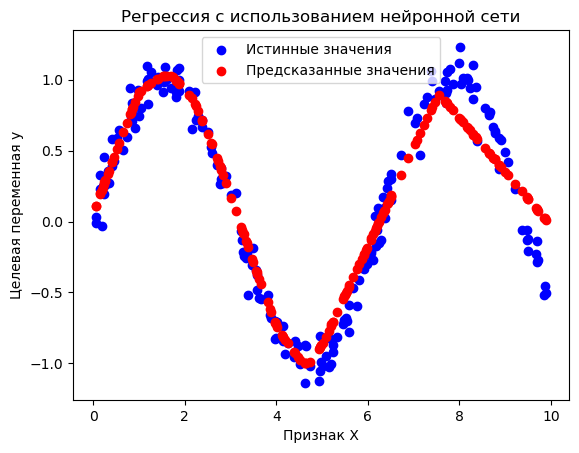

In [8]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Генерация синтетических данных
np.random.seed(42)
X = np.random.rand(1000, 1) * 10  # 1000 примеров, 1 признак
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Целевая переменная: синус с шумом

# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание и обучение модели нейронной сети
model = MLPRegressor(
    hidden_layer_sizes=(100),  # Архитектура сети: 3 скрытых слоя (100 и 50 нейронов)
    activation='relu',             # Функция активации: ReLU
    solver='adam',                 # Алгоритм оптимизации: Adam
    max_iter=3000,                 # Максимальное количество итераций
    random_state=42
)
model.fit(X_train, y_train)  # Обучение модели

# 4. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 5. Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")

# 6. Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Истинные значения')
plt.scatter(X_test, y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('Регрессия с использованием нейронной сети')
plt.legend()
plt.show()